Here we are applying Time series forecasting of the dataset, "electric_production", taken from the kaggle link: https://www.kaggle.com/code/sercanyesiloz/electricity-production-forecasting-arima/data

ARIMA is a combination of two models: AR(Autoregressive) and MA(Moving Average). 

It has three types of parameters:
    p (auto regressive lag)
    d (order of differentiation)
    q (Moving Average)
  
We need to take help of ACF (Auto correlation function) and PACF (Partial Auto Correlation function) plot to get the value of p and q.



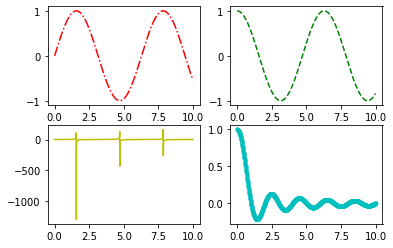

In [1]:
#importing packages
import matplotlib.pyplot as plt
import numpy as np

# making subpots objects
fig, ax = plt.subplots(2,2)

# create data
x = np.linspace(0,10,1000)

# draw graph
ax[0,0].plot(x, np.sin(x), 'r-.')
ax[0,1].plot(x,np.cos(x),'g--')
ax[1,0].plot(x,np.tan(x),'y-')
ax[1,1].plot(x,np.sinc(x),'c.-')

plt.show()

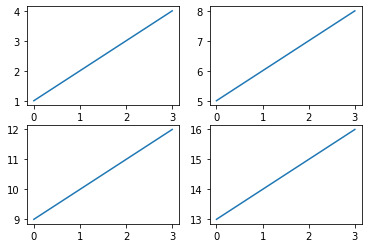

In [2]:
# Load the data
data =[[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]

# Create the figure and subplots
fig, axs = plt.subplots(2,2)

# Plot the data in the subplots
axs[0,0].plot(data[0])
axs[0,1].plot(data[1])
axs[1,0].plot(data[2])
axs[1,1].plot(data[3])

In [3]:
# using pandas library to read the data
import pandas as pd

file_location = "Electric_Production.csv"
electric_production = pd.read_csv(file_location)

electric_production.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
# Getting the datatype information of the two fields
electric_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


The data type of DATE is object. It has to be converted to datetime datatype.

In [5]:
# infer_datatime_format = True will infer datetime from the data itself
electric_production['DATE'] = pd.to_datetime(electric_production['DATE'], infer_datetime_format =True)
electric_production.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [6]:
electric_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


Now, the field : "DATE" has been converted to datetime. We need to create the index out of the field itself

In [7]:
electric_production = electric_production.set_index(['DATE'])

In [8]:
electric_production.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [9]:
electric_production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


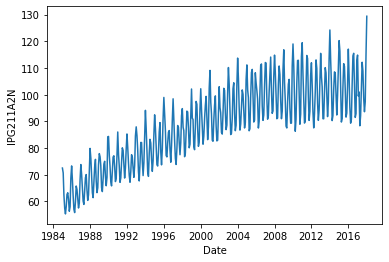

In [10]:
import matplotlib.pyplot as plt

plt.xlabel('Date')
plt.ylabel('IPG211A2N')
plt.plot(electric_production)

p is increasing over time. It has a trend part. There is seasonality. There is some randomness or error. Hence we need to remove the error as well.


How to know if the ETS has been removed from the data. That is either done visually or using some null hypothesis. If the Moving Average or moving standard deviation is constant

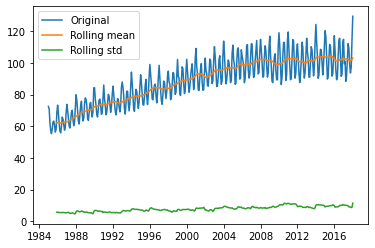

In [30]:
rolmean = electric_production.rolling(window=12).mean()
rolstd = electric_production.rolling(window=12).std()


orig = plt.plot(electric_production, label='Original')
mean = plt.plot(rolmean, label='Rolling mean')
std = plt.plot(rolstd, label='Rolling std')

plt.legend(loc='best')
plt.show()

1. From the graph, rolling mean has a trend component
2. Rolling standard deviation is fairly constant with time
3. For our time series to be stationary, we need to ensure that both the rolling statistics( avg and std dev.) remain time invariant or constant with time.                                                                        
Methodology used - Augmented Dickey Fuller Test

Now we will create a function 

In [25]:
def plot_graph(timeseries):
    rolmean = electric_production.rolling(window=12).mean()
    rolstd = electric_production.rolling(window=12).std()


    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(rolmean, label='Rolling mean')
    std = plt.plot(rolstd, label='Rolling std')

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and std dev.')
    plt.show()
    

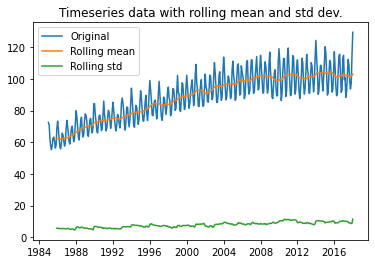

In [26]:
plot_graph(electric_production)

In [27]:
def adcf_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    
    dftest = adfuller(timeseries)
    
    print(dftest)

In [28]:
adcf_test(electric_production)

(-2.2569903500472366, 0.18621469116587053, 15, 381, {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}, 1840.8474501627156)


In [34]:
def test_stationarity(timeseries):
    rolmean = electric_production.rolling(window=12).mean()
    rolstd = electric_production.rolling(window=12).std()


    orig = plt.plot(timeseries, label='Original')
    mean = plt.plot(rolmean, label='Rolling mean')
    std = plt.plot(rolstd, label='Rolling std')

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and std dev.')
    plt.show()
    
    from statsmodels.tsa.stattools import adfuller
    
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index =['The test statistic','MacKinnons approximate p-value','#usedLags','NOBS'])
    
    print(dfoutput)

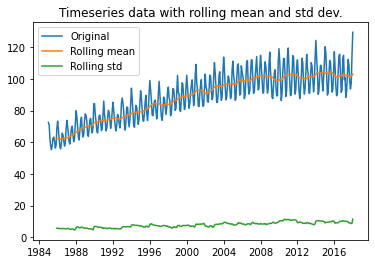

The test statistic                 -2.256990
MacKinnons approximate p-value      0.186215
#usedLags                          15.000000
NOBS                              381.000000
dtype: float64


In [35]:
test_stationarity(electric_production)

The main thing we need to observe is MacKinnon's approximate p-value and #usedLags value

We need to suppress or flatten the variance. We can use common method or popular method like Log scale of the data 

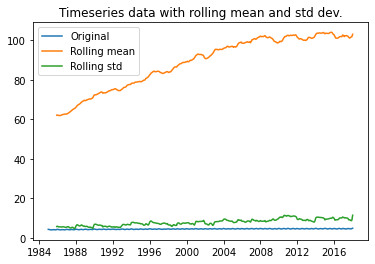

The test statistic                 -3.145360
MacKinnons approximate p-value      0.023373
#usedLags                          15.000000
NOBS                              381.000000
dtype: float64


In [36]:
import numpy as np

electric_production_log_scaled = np.log(electric_production)

test_stationarity(electric_production_log_scaled)